# Model Test #2
* Did not remove or impute negative values
* Balanced classes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json
pd.set_option('display.max_columns', None)
print('Program run at', dt.now())

Program run at 2021-05-30 17:34:37.484915


In [2]:
est = pd.read_csv('s3://bleeding-hearts/workingdata/merge_est.csv')
est.head()

,Unnamed: 0,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Civilian labor force_Unemployment Rate,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Females 16 years and over_In labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder under 6 years_All parents in family in labor force,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years_All parents in family in labor force,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,COMMUTING TO WORK_Mean travel time to work (minutes),OCCUPATION_Civilian employed population 16 years and over,"OCCUPATION_Civilian employed population 16 years and over_Management, business, science, and arts occupations",OCCUPATION_Civilian employed population 16 years and over_Service occupations,OCCUPATION_Civilian employed population 16 years and over_Sales and office occupations,"OCCUPATION_Civilian employed population 16 years and over_Natural resources, construction, and maintenance occupations","OCCUPATION_Civilian employed population 16 years and over_Production, transportation, and material moving occupations",INDUSTRY_Civilian employed population 16 years and over,"INDUSTRY_Civilian employed population 16 years and over_Agriculture, forestry, fishing and hunting, and mining",INDUSTRY_Civilian employed population 16 years and over_Construction,INDUSTRY_Civilian employed population 16 years and over_Manufacturing,INDUSTRY_Civilian employed population 16 years and over_Wholesale trade,INDUSTRY_Civilian employed population 16 years and over_Retail trade,"INDUSTRY_Civilian employed population 16 years and over_Transportation and warehousing, and utilities",INDUSTRY_Civilian employed population 16 years and over_Information,"INDUSTRY_Civilian employed population 16 years and over_Finance and insurance, and real estate and rental and leasing","INDUSTRY_Civilian employed population 16 years and over_Professional, scientific, and management, and administrative and waste management services","INDUSTRY_Civilian employed population 16 years and over_Educational services, and health care and social assistance","INDUSTRY_Civilian employed population 16 years and over_Arts, entertainment, and recreation, and accommodation and food services","INDUSTRY_Civilian employed population 16 years and over_Other services, except public administration",INDUSTRY_Civilian employed population 16 years and over_Public administration,CLASS OF WORKER_Civilian employed population 16 years and over,CLASS OF WORKER_Civilian employed population 16 years and over_Private wage and salary workers,CLASS OF WORKER_Civilian employed population 16 years and over_Government workers,CLASS OF WORKER_Civilian employed population 16 years and over_Self-employed in own not incorporated business workers,CLASS OF W

In [3]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(143), object(4)
memory usage: 21.3+ MB


In [4]:
pct = pd.read_csv('s3://bleeding-hearts/workingdata/merge_pct.csv')
pct.head()

,Unnamed: 0,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Civilian labor force_Unemployment Rate,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Females 16 years and over_In labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder under 6 years_All parents in family in labor force,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years_All parents in family in labor force,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,COMMUTING TO WORK_Mean travel time to work (minutes),OCCUPATION_Civilian employed population 16 years and over,"OCCUPATION_Civilian employed population 16 years and over_Management, business, science, and arts occupations",OCCUPATION_Civilian employed population 16 years and over_Service occupations,OCCUPATION_Civilian employed population 16 years and over_Sales and office occupations,"OCCUPATION_Civilian employed population 16 years and over_Natural resources, construction, and maintenance occupations","OCCUPATION_Civilian employed population 16 years and over_Production, transportation, and material moving occupations",INDUSTRY_Civilian employed population 16 years and over,"INDUSTRY_Civilian employed population 16 years and over_Agriculture, forestry, fishing and hunting, and mining",INDUSTRY_Civilian employed population 16 years and over_Construction,INDUSTRY_Civilian employed population 16 years and over_Manufacturing,INDUSTRY_Civilian employed population 16 years and over_Wholesale trade,INDUSTRY_Civilian employed population 16 years and over_Retail trade,"INDUSTRY_Civilian employed population 16 years and over_Transportation and warehousing, and utilities",INDUSTRY_Civilian employed population 16 years and over_Information,"INDUSTRY_Civilian employed population 16 years and over_Finance and insurance, and real estate and rental and leasing","INDUSTRY_Civilian employed population 16 years and over_Professional, scientific, and management, and administrative and waste management services","INDUSTRY_Civilian employed population 16 years and over_Educational services, and health care and social assistance","INDUSTRY_Civilian employed population 16 years and over_Arts, entertainment, and recreation, and accommodation and food services","INDUSTRY_Civilian employed population 16 years and over_Other services, except public administration",INDUSTRY_Civilian employed population 16 years and over_Public administration,CLASS OF WORKER_Civilian employed population 16 years and over,CLASS OF WORKER_Civilian employed population 16 years and over_Private wage and salary workers,CLASS OF WORKER_Civilian employed population 16 years and over_Government workers,CLASS OF WORKER_Civilian employed population 16 years and over_Self-employed in own not incorporated business workers,CLASS OF W

In [5]:
pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(102), int64(42), object(4)
memory usage: 21.3+ MB


In [6]:
for i in [est,pct]:
    i.drop(columns=['Unnamed: 0'],inplace=True)
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Columns: 147 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(142), object(4)
memory usage: 21.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Columns: 147 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(102), int64(41), object(4)
memory usage: 21.2+ MB
None


In [7]:
#column names are the same in est and pct
cols=list(est)
cat_cols=cols[-8:-5]
num_cols=cols[-4:]
print(cat_cols,'\n\n',num_cols)

['Child Opportunity Levels, education domain, nationally- normed', 'Child Opportunity Levels, health and environment domain, nationally-normed', 'Child Opportunity Levels, social and economic domain, nationally-normed'] 

 ['Child Opportunity Scores, education domain, nationally- normed', 'Child Opportunity Scores, health and environment domain, nationally-normed', 'Child Opportunity Scores, social and economic domain, nationally-normed', 'Child Opportunity Scores, overall COI, nationally-normed']


In [8]:
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
import warnings
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

#from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance
from sklearn.utils import resample

from sklearn.model_selection import train_test_split as tts

In [26]:
def viz_cb(y,lst):
    visualizer = ClassBalance(labels=lst)
    visualizer.fit(y)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [29]:
def class_balance(df,target):
    print('Raw Value Counts:','\n',df[target].value_counts())
    X = df.loc[:, df.columns != target]
    y = df[target]
    #make a dataframe of value counts and a list of the values in the target
    df1 = y.value_counts().to_frame('count').reset_index(level=0).rename(columns={'index':'value'})
    label_lst = list(df1['value'])
    
    viz_cb(y,label_lst)

    #identify minimum value number and label name
    mi = df1['count'].min()
    name = df1.loc[df1['count'] == mi,'value'].iloc[0]
    print('min value is',name,'in values',label_lst)

    seed = 123
    # Downsample majority class
    
    #use min value number and label name to resample the dataframe
    df2 = pd.concat([resample(df[df[target]== i],
                            replace=False,
                            n_samples=mi,
                            random_state=seed) for i in label_lst if i != name]).append(df[df[target]== name])
    print('Resampled Value Counts:','\n',df2[target].value_counts())
    X = df2.loc[:, df.columns != target]
    y = df2[target]
    viz_cb(y,label_lst)
    return df2

In [11]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

In [12]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)


models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average='micro')))

In [13]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['Very Low','Low','Moderate','High','Very High'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

Target = Child Opportunity Levels, education domain, nationally- normed
Raw Value Counts: 
 Low          5610
Moderate     4801
Very Low     3167
High         3108
Very High    2211
Name: Child Opportunity Levels, education domain, nationally- normed, dtype: int64


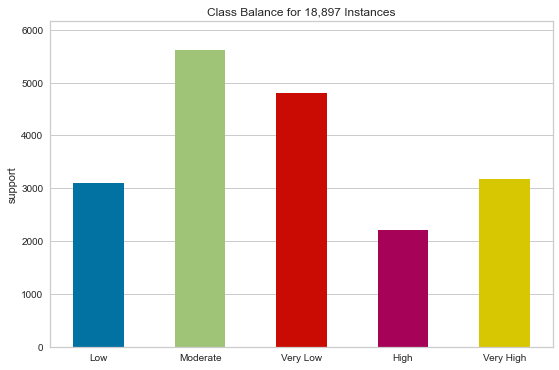

min value is Very High in values ['Low', 'Moderate', 'Very Low', 'High', 'Very High']
Resampled Value Counts: 
 High         2211
Very High    2211
Low          2211
Moderate     2211
Very Low     2211
Name: Child Opportunity Levels, education domain, nationally- normed, dtype: int64


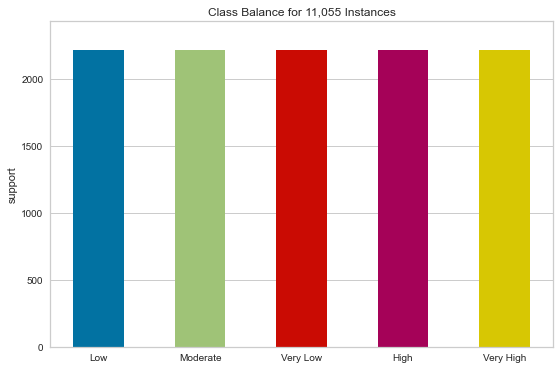

(8844, 146) (8844,)
(2211, 146) (2211,)
F1 SCORE SVC: 0.767345092718227


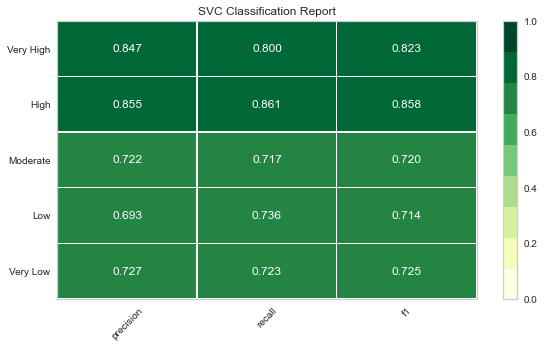

F1 SCORE NuSVC: 0.7938489371325191


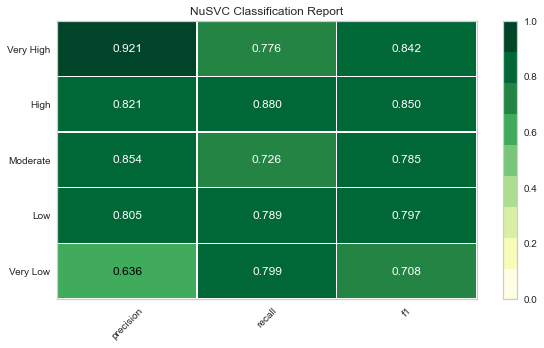

F1 SCORE LinearSVC: 0.674898236092266


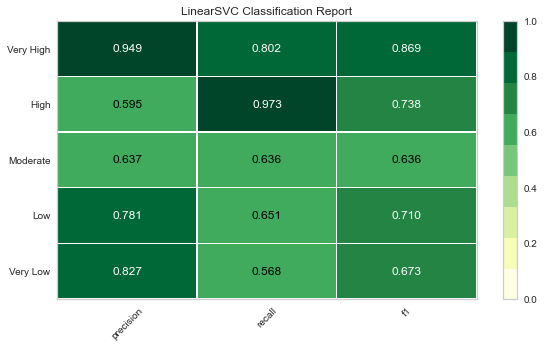

F1 SCORE SGDClassifier: 0.23672546359113522


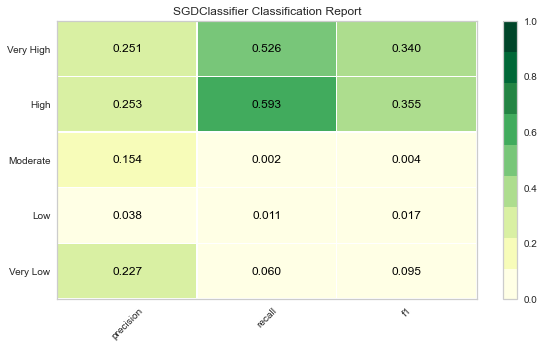

F1 SCORE KNeighborsClassifier: 0.669742198100407


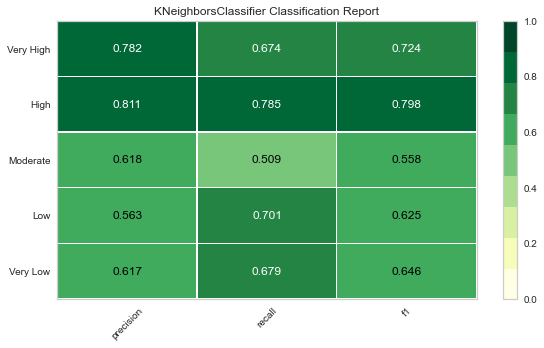

F1 SCORE LogisticRegression: 0.29724106739032113


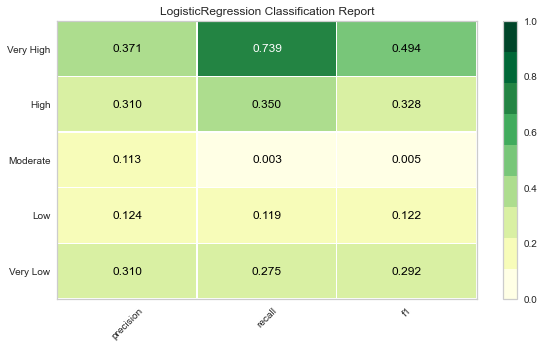

F1 SCORE LogisticRegressionCV: 0.30764360018091363


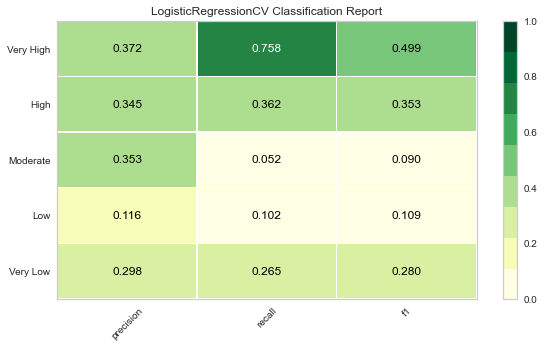

F1 SCORE BaggingClassifier: 1.0


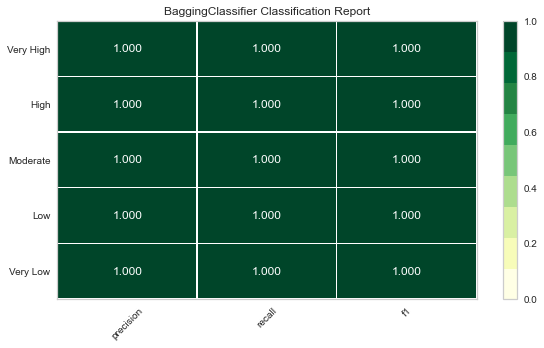

F1 SCORE ExtraTreesClassifier: 1.0


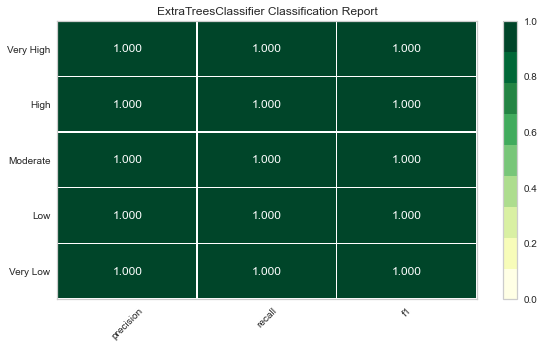

F1 SCORE RandomForestClassifier: 1.0


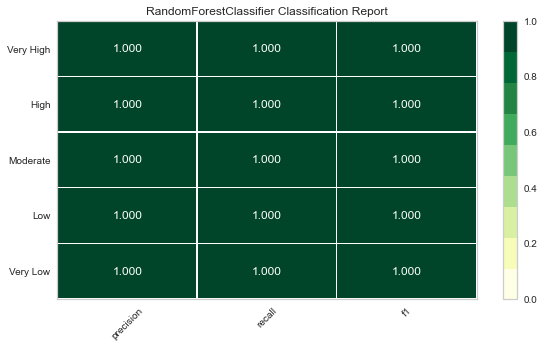

Target = Child Opportunity Levels, health and environment domain, nationally-normed
Raw Value Counts: 
 Very Low     6746
Low          4313
Moderate     3440
High         2757
Very High    1641
Name: Child Opportunity Levels, health and environment domain, nationally-normed, dtype: int64


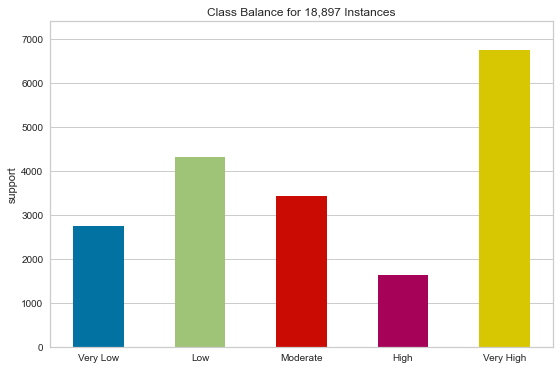

min value is Very High in values ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
Resampled Value Counts: 
 High         1641
Moderate     1641
Very High    1641
Very Low     1641
Low          1641
Name: Child Opportunity Levels, health and environment domain, nationally-normed, dtype: int64


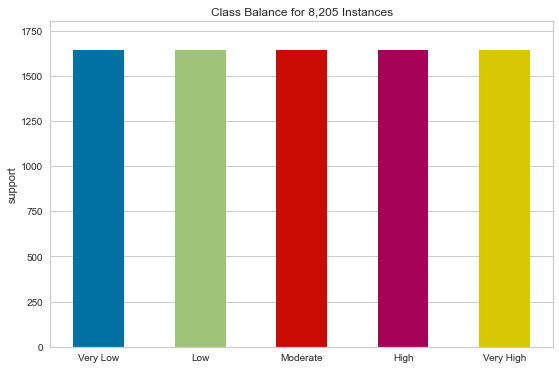

(6564, 146) (6564,)
(1641, 146) (1641,)
F1 SCORE SVC: 0.768677635588056


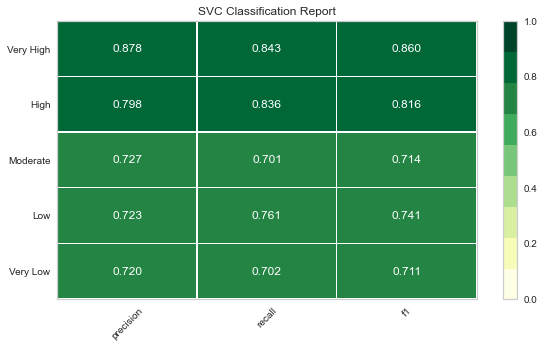

F1 SCORE NuSVC: 0.8769043266301036


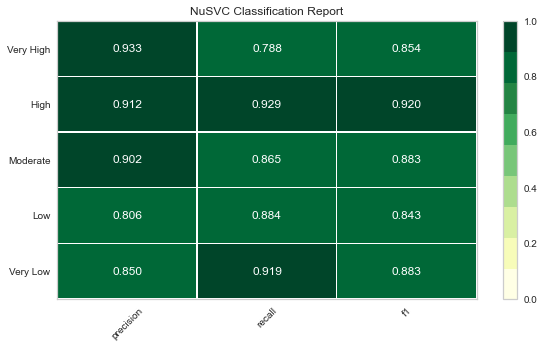

F1 SCORE LinearSVC: 0.6770262035344302


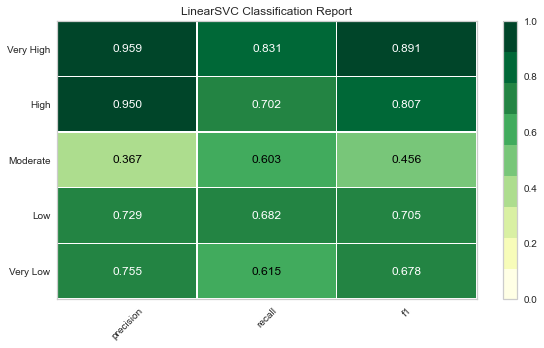

F1 SCORE SGDClassifier: 0.19439366240097503


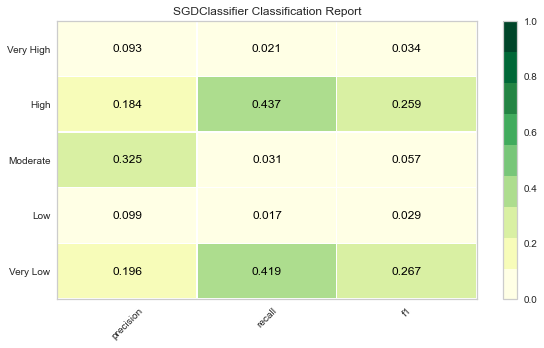

F1 SCORE KNeighborsClassifier: 0.6166971358927483


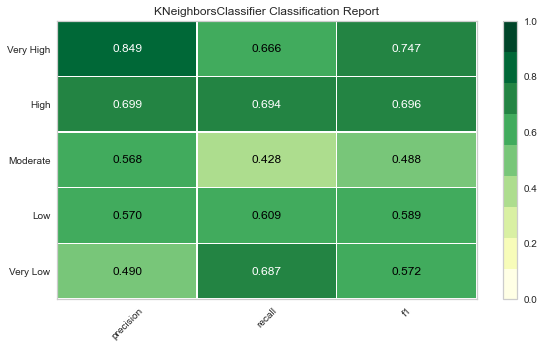

F1 SCORE LogisticRegression: 0.2603290676416819


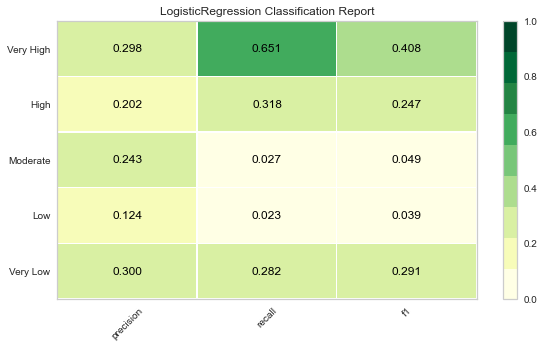

F1 SCORE LogisticRegressionCV: 0.23010359536867764


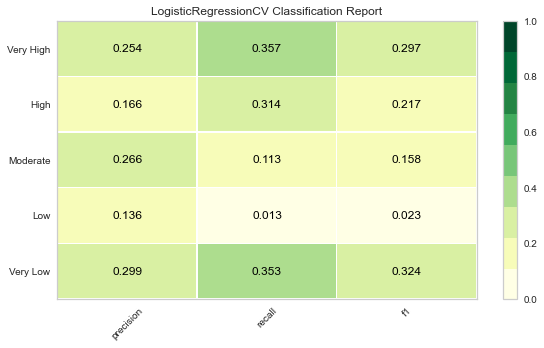

F1 SCORE BaggingClassifier: 1.0


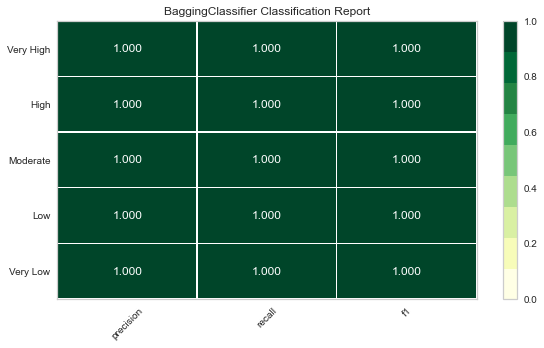

F1 SCORE ExtraTreesClassifier: 1.0


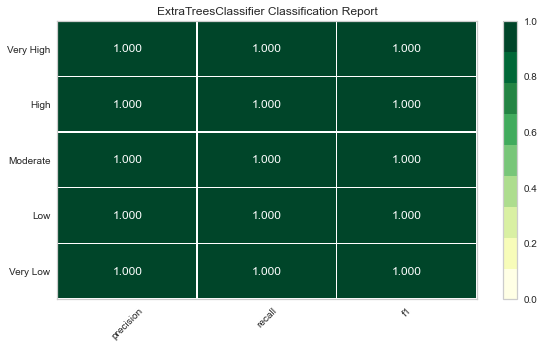

F1 SCORE RandomForestClassifier: 1.0


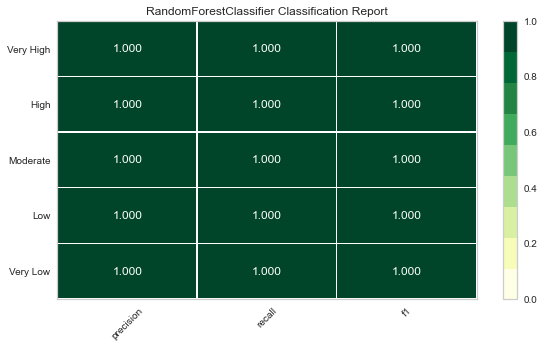

Target = Child Opportunity Levels, social and economic domain, nationally-normed
Raw Value Counts: 
 Very Low     4376
Low          4203
Moderate     3958
High         3409
Very High    2951
Name: Child Opportunity Levels, social and economic domain, nationally-normed, dtype: int64


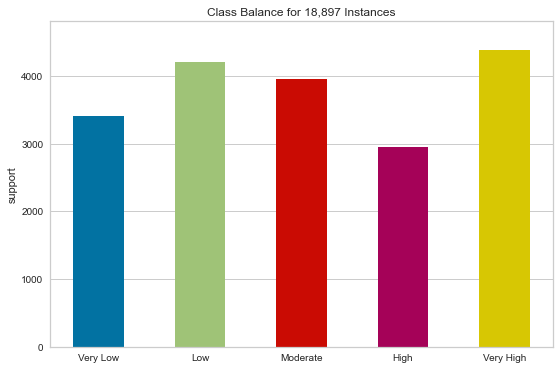

min value is Very High in values ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
Resampled Value Counts: 
 High         2951
Very High    2951
Low          2951
Moderate     2951
Very Low     2951
Name: Child Opportunity Levels, social and economic domain, nationally-normed, dtype: int64


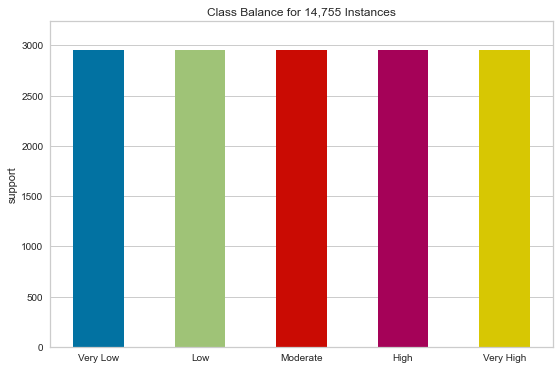

(11804, 146) (11804,)
(2951, 146) (2951,)
F1 SCORE SVC: 0.8161301253812268


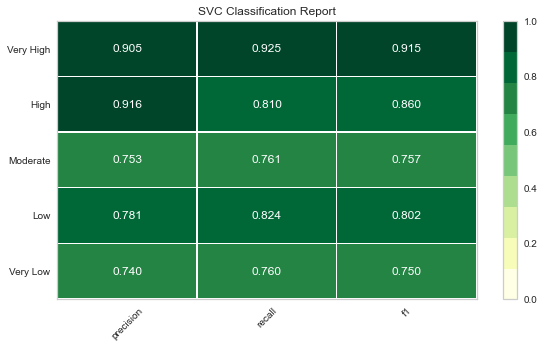

F1 SCORE NuSVC: 0.7519484920365976


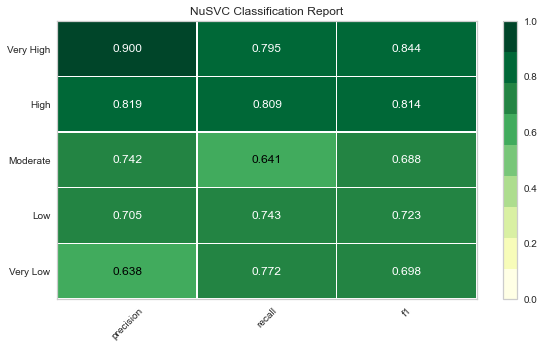

F1 SCORE LinearSVC: 0.6955608268383598


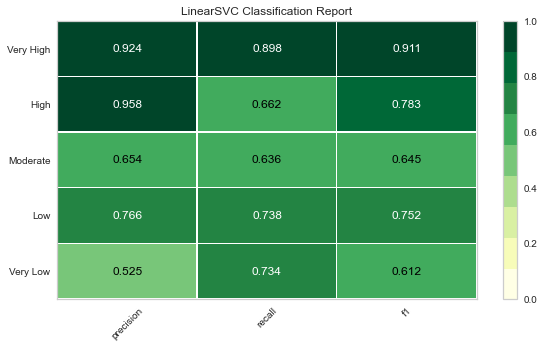

F1 SCORE SGDClassifier: 0.2288715689596747


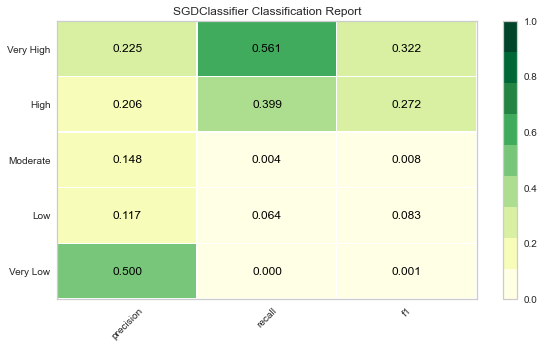

F1 SCORE KNeighborsClassifier: 0.7422568620806508


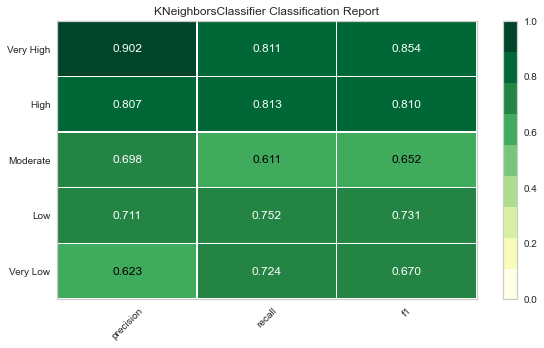

F1 SCORE LogisticRegression: 0.3155540494747543


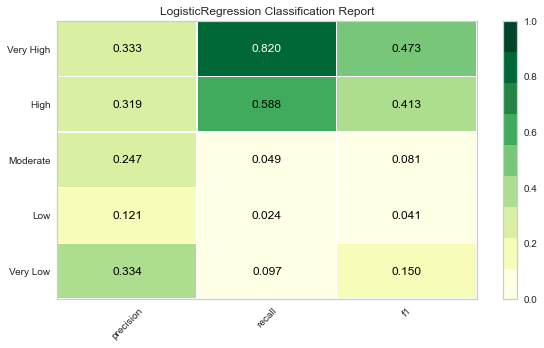

F1 SCORE LogisticRegressionCV: 0.31711284310403254


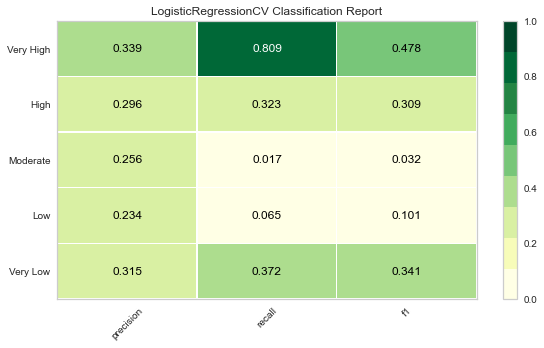

F1 SCORE BaggingClassifier: 1.0


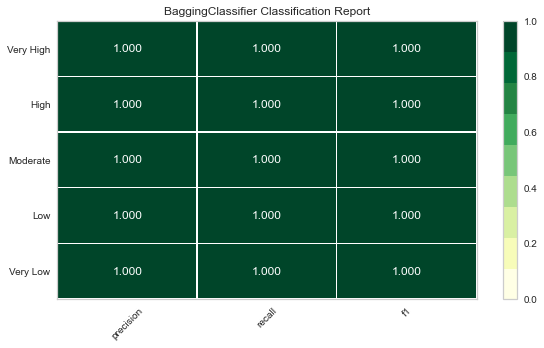

F1 SCORE ExtraTreesClassifier: 1.0


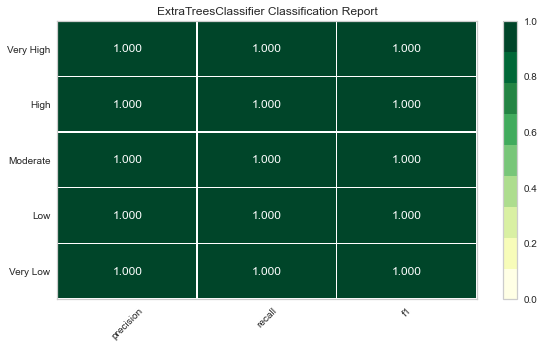

F1 SCORE RandomForestClassifier: 1.0


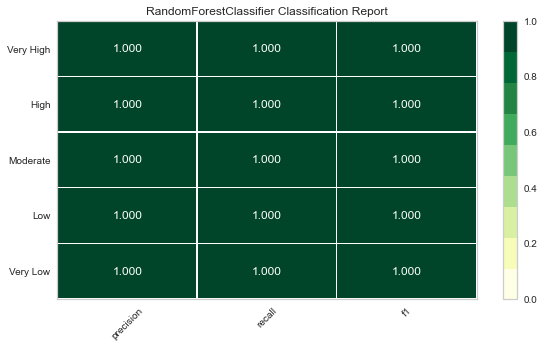

In [30]:
for i in cat_cols:
    print('Target =', i)
    data = class_balance(est,i)
    X = data.loc[:, data.columns != i]
    y = data[i]
    train_test(X,y)
    for model in models:
        try:
            score_model(X, y, model)
            visualize_model(X, y, model)
        except:
            print("error in",model)

Target = Child Opportunity Levels, education domain, nationally- normed
Raw Value Counts: 
 Low          5610
Moderate     4801
Very Low     3167
High         3108
Very High    2211
Name: Child Opportunity Levels, education domain, nationally- normed, dtype: int64


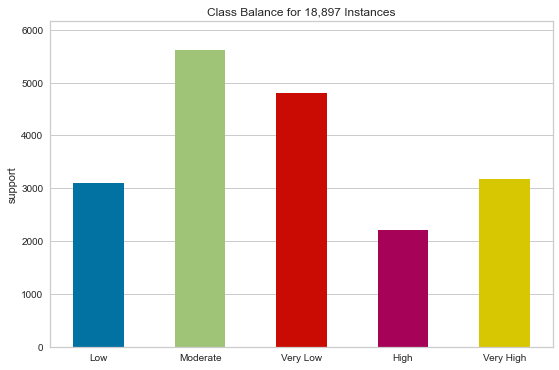

min value is Very High in values ['Low', 'Moderate', 'Very Low', 'High', 'Very High']
Resampled Value Counts: 
 High         2211
Very High    2211
Low          2211
Moderate     2211
Very Low     2211
Name: Child Opportunity Levels, education domain, nationally- normed, dtype: int64


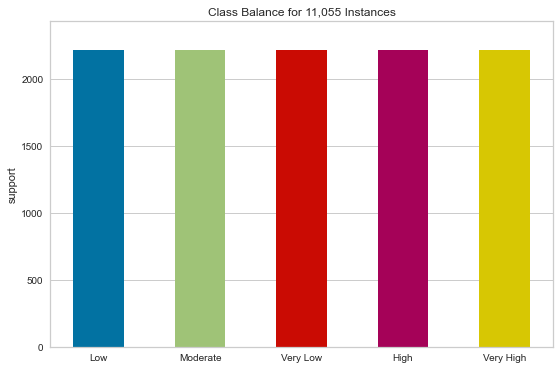

(8844, 146) (8844,)
(2211, 146) (2211,)
F1 SCORE SVC: 0.7403889642695614


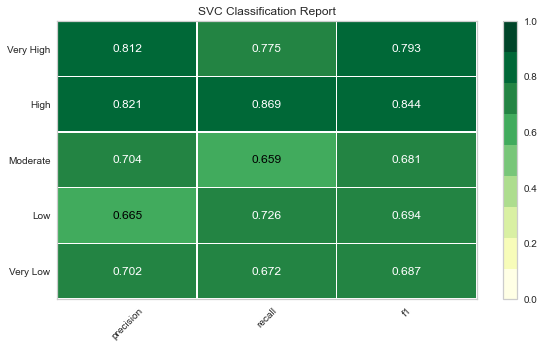

F1 SCORE NuSVC: 0.7640886476707374


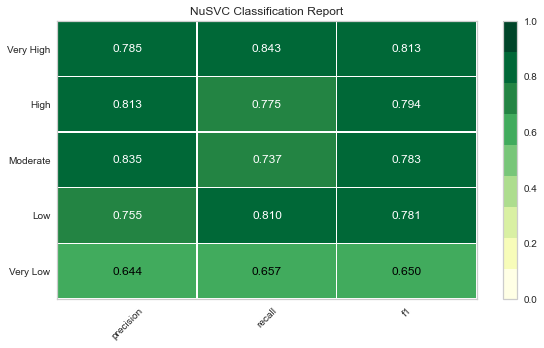

F1 SCORE LinearSVC: 0.6966983265490728


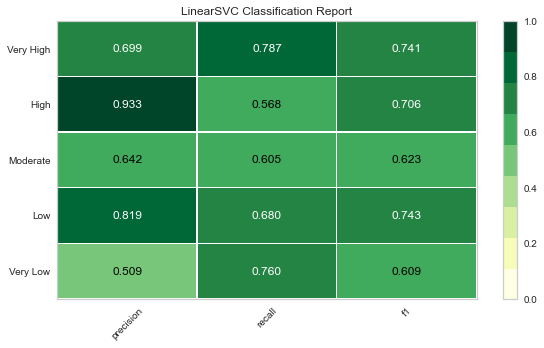

F1 SCORE SGDClassifier: 0.29986431478968795


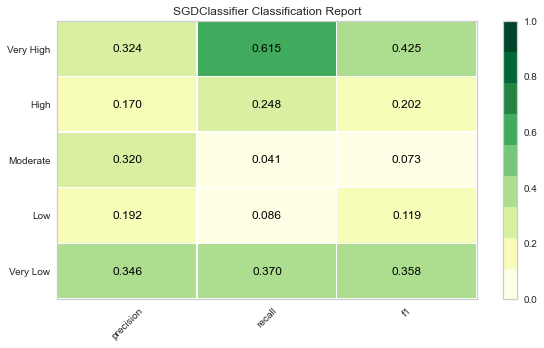

F1 SCORE KNeighborsClassifier: 0.6693803708729081


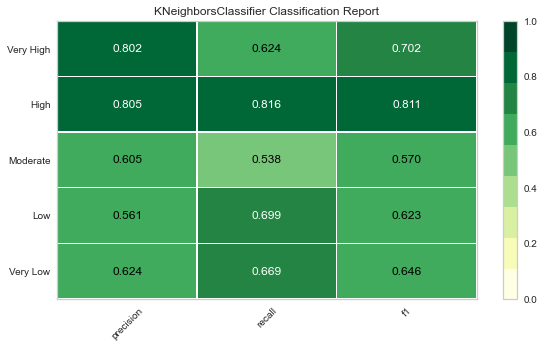

F1 SCORE LogisticRegression: 0.29063772048846676


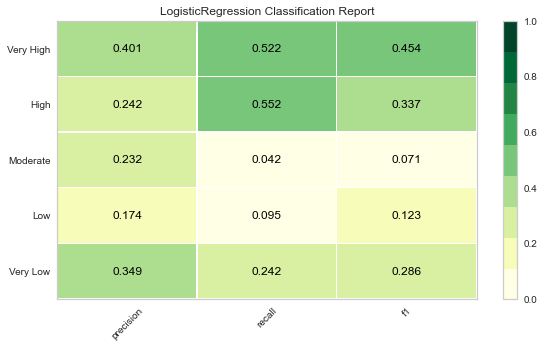

F1 SCORE LogisticRegressionCV: 0.30366350067842607


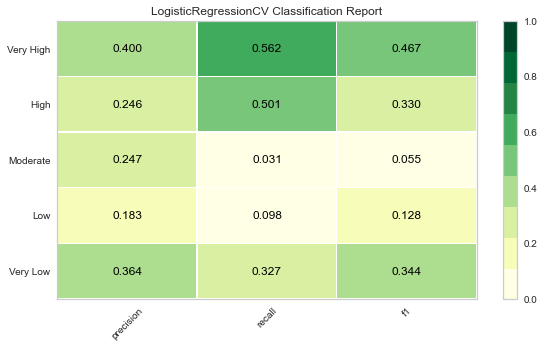

F1 SCORE BaggingClassifier: 1.0


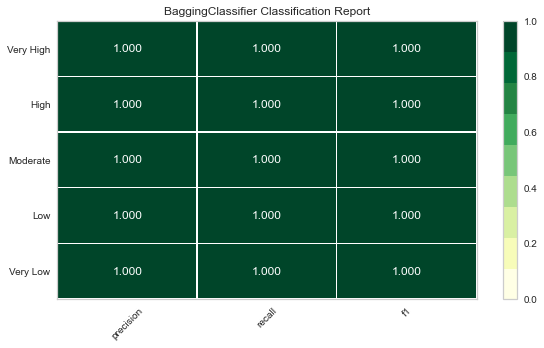

F1 SCORE ExtraTreesClassifier: 1.0


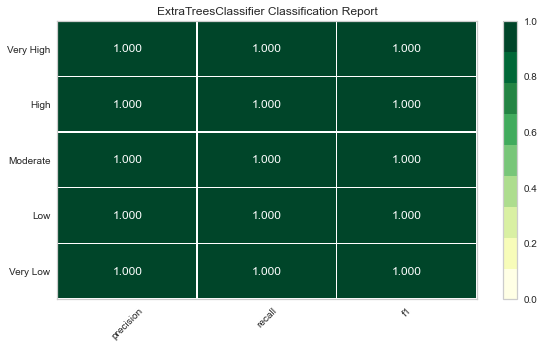

F1 SCORE RandomForestClassifier: 1.0


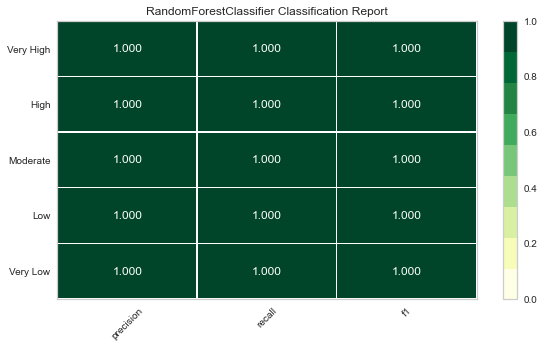

Target = Child Opportunity Levels, health and environment domain, nationally-normed
Raw Value Counts: 
 Very Low     6746
Low          4313
Moderate     3440
High         2757
Very High    1641
Name: Child Opportunity Levels, health and environment domain, nationally-normed, dtype: int64


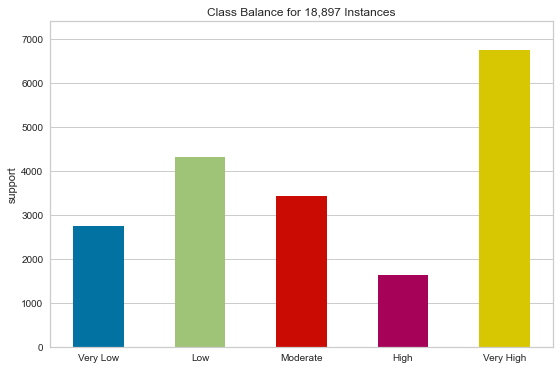

min value is Very High in values ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
Resampled Value Counts: 
 High         1641
Moderate     1641
Very High    1641
Very Low     1641
Low          1641
Name: Child Opportunity Levels, health and environment domain, nationally-normed, dtype: int64


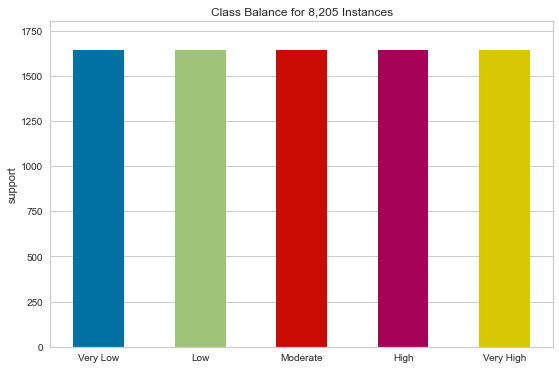

(6564, 146) (6564,)
(1641, 146) (1641,)
F1 SCORE SVC: 0.7384521633150518


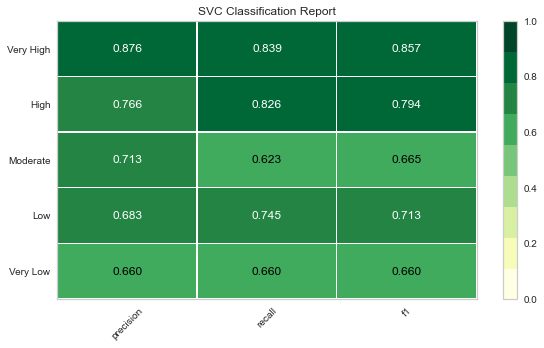

F1 SCORE NuSVC: 0.8159658744667886


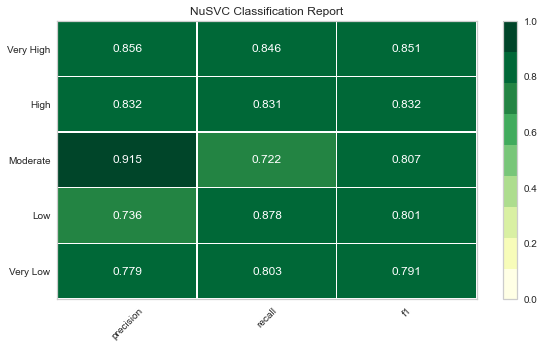

F1 SCORE LinearSVC: 0.6901889092017063


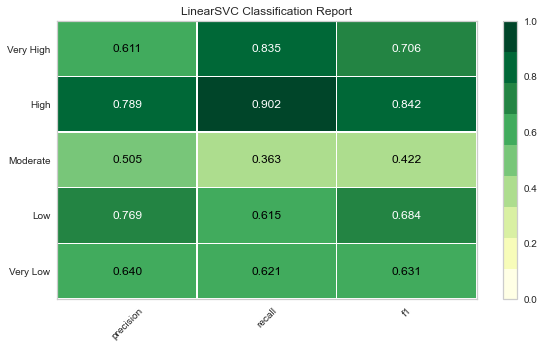

F1 SCORE SGDClassifier: 0.24911639244363193


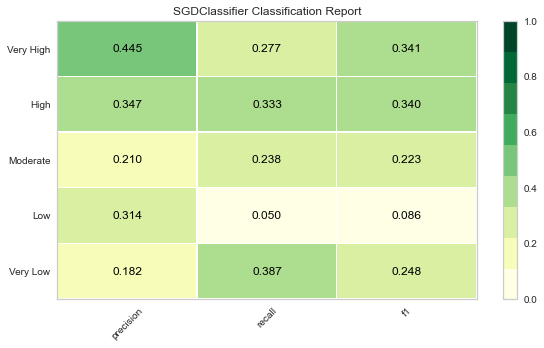

F1 SCORE KNeighborsClassifier: 0.6075563680682511


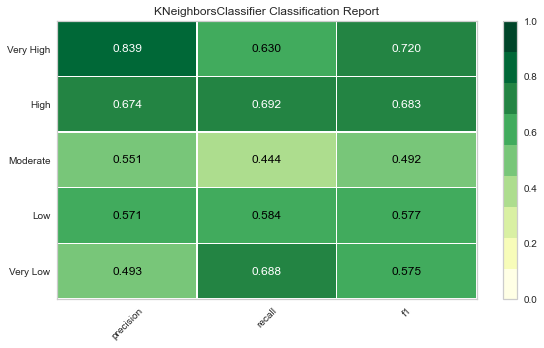

F1 SCORE LogisticRegression: 0.27507617306520415


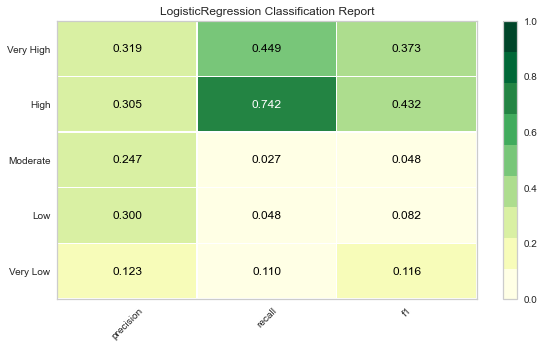

F1 SCORE LogisticRegressionCV: 0.2877513711151737


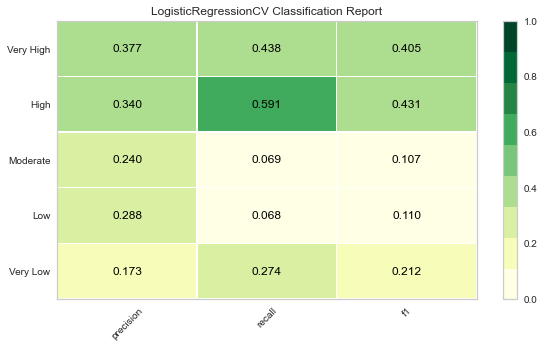

F1 SCORE BaggingClassifier: 1.0


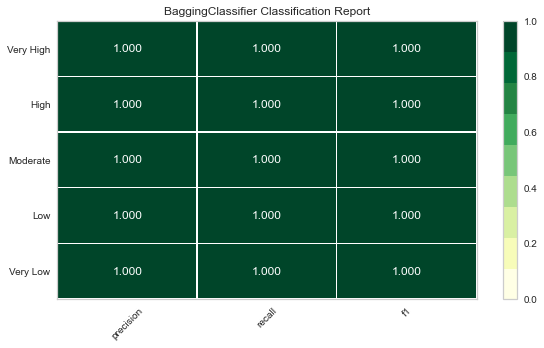

F1 SCORE ExtraTreesClassifier: 1.0


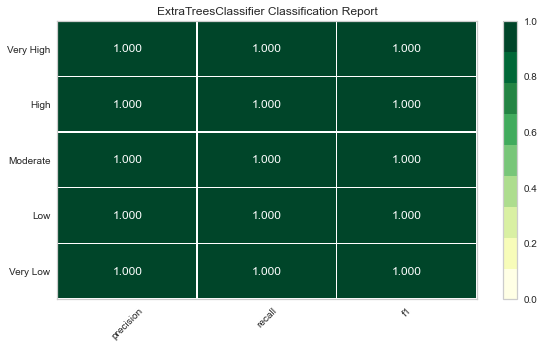

F1 SCORE RandomForestClassifier: 1.0


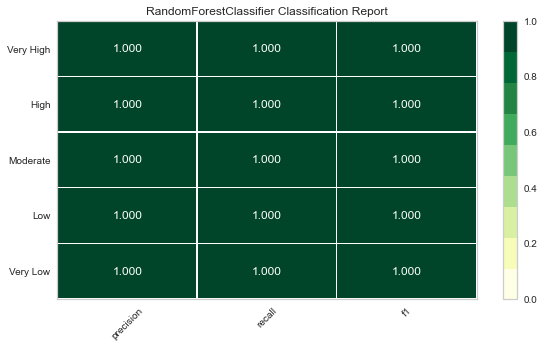

Target = Child Opportunity Levels, social and economic domain, nationally-normed
Raw Value Counts: 
 Very Low     4376
Low          4203
Moderate     3958
High         3409
Very High    2951
Name: Child Opportunity Levels, social and economic domain, nationally-normed, dtype: int64


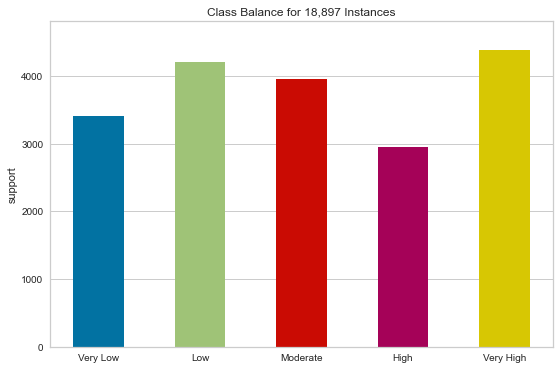

min value is Very High in values ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
Resampled Value Counts: 
 High         2951
Very High    2951
Low          2951
Moderate     2951
Very Low     2951
Name: Child Opportunity Levels, social and economic domain, nationally-normed, dtype: int64


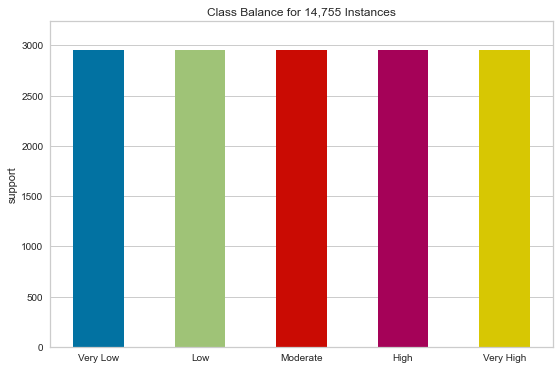

(11804, 146) (11804,)
(2951, 146) (2951,)
F1 SCORE SVC: 0.7878685191460522


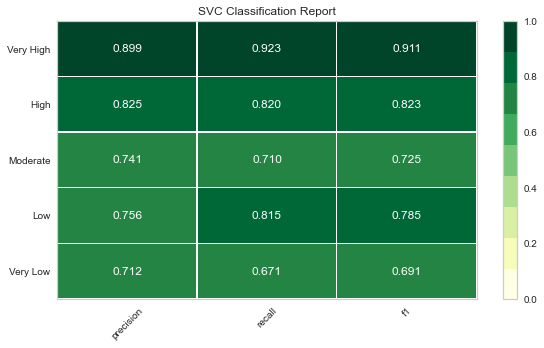

F1 SCORE NuSVC: 0.7165028803795324


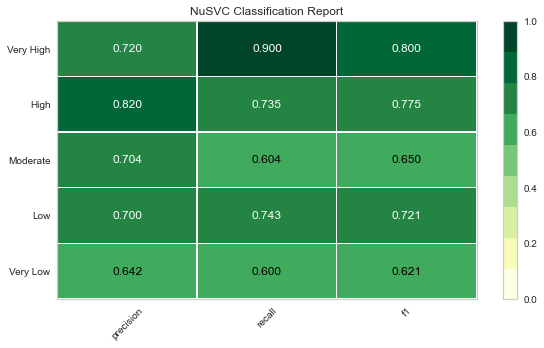

F1 SCORE LinearSVC: 0.7162995594713657


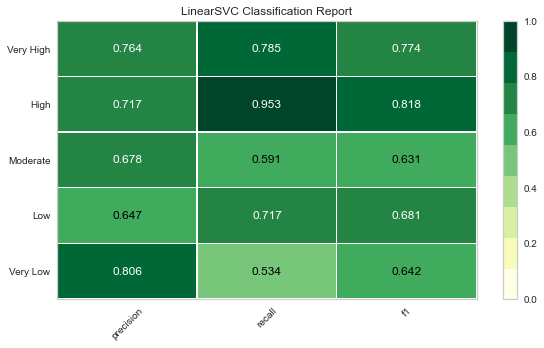

F1 SCORE SGDClassifier: 0.26790918332768554


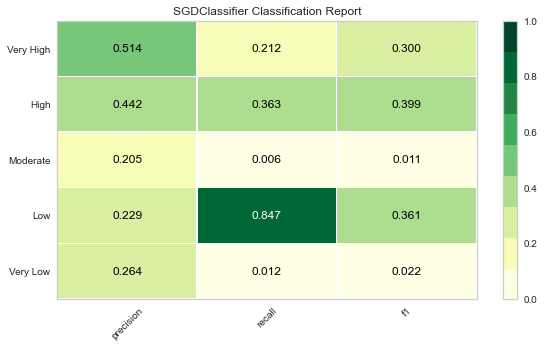

F1 SCORE KNeighborsClassifier: 0.7374449339207048


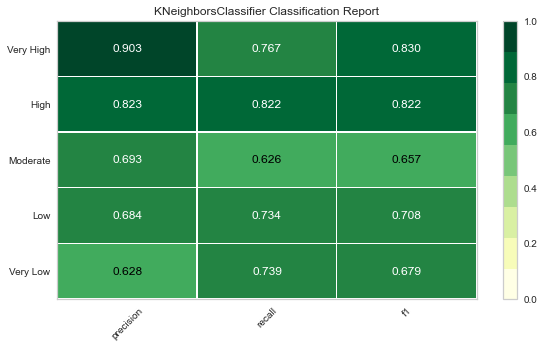

F1 SCORE LogisticRegression: 0.3001016604540834


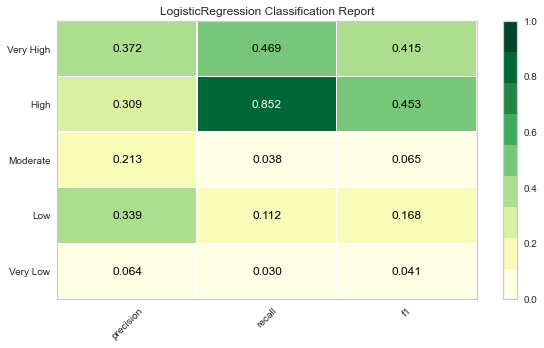

F1 SCORE LogisticRegressionCV: 0.30606574042697393


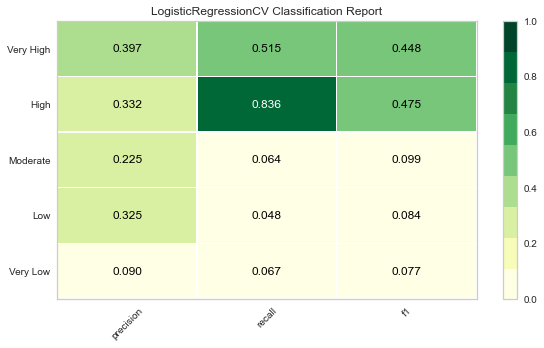

F1 SCORE BaggingClassifier: 1.0


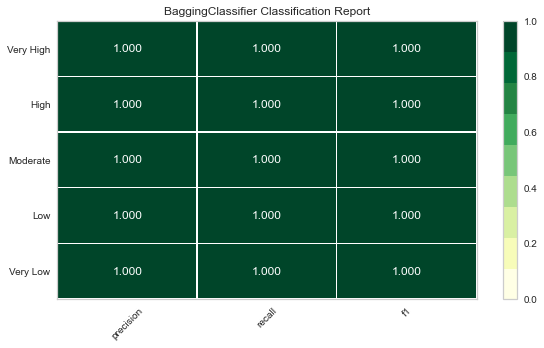

F1 SCORE ExtraTreesClassifier: 1.0


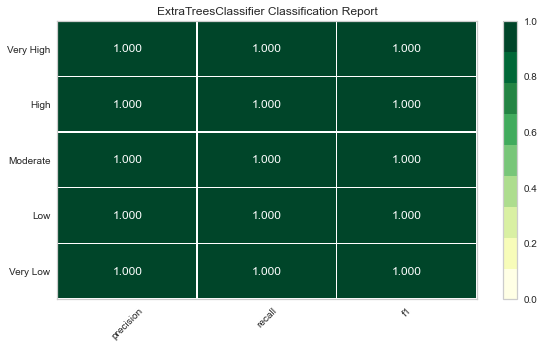

F1 SCORE RandomForestClassifier: 1.0


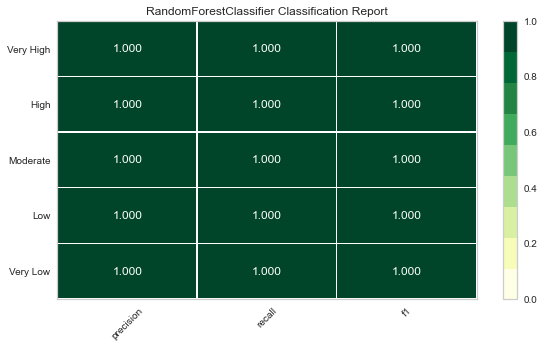

In [31]:
for i in cat_cols:
    print('Target =', i)
    data = class_balance(pct,i)
    X = data.loc[:, data.columns != i]
    y = data[i]
    train_test(X,y)
    for model in models:
        try:
            score_model(X, y, model)
            visualize_model(X, y, model)
        except:
            print("error in",model)